In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
from platform import python_version
print(python_version())

3.11.8


In [3]:
diabetes_data = pd.read_csv(r'C:\Users\NDE\Downloads\diabetes.csv')

In [4]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_data.shape

(768, 9)

In [6]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
#Feature Selection Process using Filter method

In [11]:
#data = diabetes_data.values
#X=data[:,0:8]
#Y=data[:,8]

In [12]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2

In [13]:
#chi_best = SelectKBest(score_func=chi2)
#k_best = chi_best.fit(X,Y)

In [14]:
#np.set_printoptions()
#k_features = k_best.transform(X)

#Choosing X-features, Y features

In [15]:
X = diabetes_data.drop(columns={'Outcome', 'Age'})
Y = diabetes_data['Outcome']


In [16]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288


In [17]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [18]:
#Data Standardization

In [19]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [20]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ... -0.69289057  0.20401277
   0.46849198]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.69289057 -0.68442195
  -0.36506078]
 [ 1.23388019  1.94372388 -0.26394125 ... -0.69289057 -1.10325546
   0.60439732]
 ...
 [ 0.3429808   0.00330087  0.14964075 ...  0.27959377 -0.73518964
  -0.68519336]
 [-0.84488505  0.1597866  -0.47073225 ... -0.69289057 -0.24020459
  -0.37110101]
 [-0.84488505 -0.8730192   0.04624525 ... -0.69289057 -0.20212881
  -0.47378505]]


In [21]:
X = standardized_data

In [22]:
#Splitting data to training and test data

In [23]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(768, 7) (614, 7) (154, 7)


In [25]:
#Training th SVM model

In [26]:
model =svm.SVC(kernel='linear')
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [27]:
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [28]:
print(train_data_accuracy*100)

78.50162866449512


In [29]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)

In [30]:
print(test_data_accuracy*100)

76.62337662337663


In [44]:
#from sklearn.model_selection import GridSearchCV 

# defining parameter range 
#param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			#'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			#'kernel': ['rbf']} 

#grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
#grid.fit(X_train, Y_train) 


In [45]:
#grid_predictions = grid.predict(X_test) 
  
# print classification report 
#print(classification_report(Y_test, grid_predictions)) 

In [33]:
cm = confusion_matrix(Y_test, X_test_prediction)

In [34]:
print(cm)

[[91  9]
 [27 27]]


In [35]:
model.classes_

array([0, 1], dtype=int64)

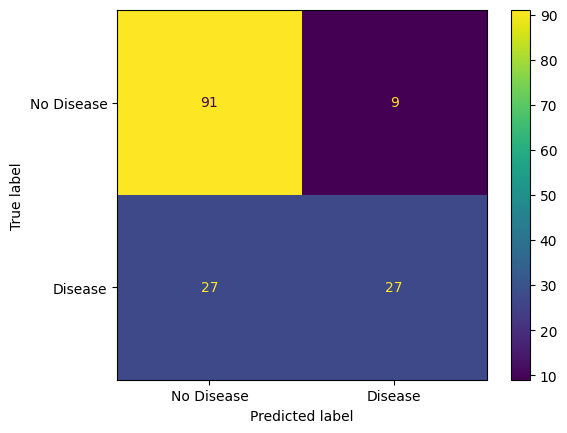

In [36]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels =['No Disease','Disease'])
cm_display.plot()

In [37]:
tn, fp, fn, tp = confusion_matrix(Y_test, X_test_prediction).ravel()
tn, fp, fn, tp
matrix = classification_report(Y_test, X_test_prediction)
print('Classifivation Report: \n', matrix)

Classifivation Report: 
               precision    recall  f1-score   support

           0       0.77      0.91      0.83       100
           1       0.75      0.50      0.60        54

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154



# Building Predictive model

In [38]:
input_data = (1,109,58,18,116,28.5,0.219)
input_to_array = np.asarray(input_data)
input_reshape = input_to_array.reshape(1,-1)
std_data = scaler.transform(input_reshape)
predict = model.predict(std_data)
print(predict)

[0]


C:\Users\NDE\anaconda3\envs\Data_Science\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:
#Predict input

In [40]:

if (predict[0]==0):
    print("The person has no diabetes disease")
else:
    print("The person has diabetes disease, please Visit one of the diabetes specialist")

The person has no diabetes disease


In [41]:
#saving trained model

In [42]:
import pickle
filename = 'diabetic_trained_model.sav'
pickle.dump(model, open(filename, 'wb'))
load_model = pickle.load(open('diabetic_trained_model.sav', 'rb'))